In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_2568326/2660915427.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
gemma  -b ../1001g_grenet_climate -gk 1 -o kinship_bslmm

In [ ]:
gemma  -g 1001g_grenet_climate.bimbam 
-p bioclim/bio${i}.txt 
-epm output/bio${i}.param.txt 
-emu output/bio${i}.log.txt 
-ebv output/bio${i}.bv.txt 
-k output/bio${i}.cXX.txt 
-predict 1 
-o bio${i}"


In [71]:
pd.read_csv('../1001g_grenet_climate.fam', header=None, sep = ' ')#.drop(5,axis=1)

,0,1,2,3,4,5
0,10001,10001,0,0,0,9.166667
1,10002,10002,0,0,0,-9.000000
2,10004,10004,0,0,0,10.358334
3,10005,10005,0,0,0,9.866667
4,10006,10006,0,0,0,-9.000000
...,...,...,...,...,...,...
1132,100002,100002,0,0,0,-9.000000
1133,6939,6939,0,0,0,-9.000000
1134,9940,9940,0,0,0,-9.000000
1135,9977,9977,0,0,0,-9.000000


In [ ]:
gemma \
-bfile ../1001g_grenet_climate \
-bslmm 1 \
-o bslmm_1001g_grenet_climate

In [ ]:
gemma  -b ../1001g_grenet_climate \
-epm output/bslmm_1001g_grenet_climate.param.txt \
-emu output/bslmm_1001g_grenet_climate.log.txt \
-ebv output/bslmm_1001g_grenet_climate.bv.txt \
-k output/kinship_bslmm.cXX.txt \
-predict 1 \
-o pheno_pred_bslmm


In [ ]:
#nogrenet_fam = pd.read_csv('nogrenenet_1001g_grenet_climate.fam', header=None, sep = ' ')

#full_fam = pd.read_csv('../1001g_grenet_climate.fam', header=None, sep = ' ').drop(5,axis=1)

#full_fam = full_fam.merge(nogrenet_fam, how = 'left')

#full_fam.to_csv('../1001g_grenet_climate.fam', header=None, index=None, sep = ' ')

#full_fam =  pd.read_csv('../1001g_grenet_climate.fam', header=None, sep = ' ')

#full_fam[5] = full_fam[5].fillna('-9')

#full_fam.to_csv('../1001g_grenet_climate.fam', header=None, index=None, sep = ' ')

In [2]:
assoc = pd.read_csv('output/bslmm_nogrenenet_1001g_grenet_climate.param.txt', sep = '\t')

In [72]:
assoc = pd.read_csv('output/bslmm_1001g_grenet_climate.param.txt', sep = '\t')

In [73]:
assoc['gamma'].describe()

count    2.306750e+06
mean     1.071321e-05
std      1.255712e-03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: gamma, dtype: float64

In [74]:
assoc.sort_values('gamma')

,chr,rs,ps,n_miss,alpha,beta,gamma
0,1,1_291,291,0,0.000012,0.000000,0.00000
1535575,4,4_6324984,6324984,0,0.000005,0.000000,0.00000
1535574,4,4_6324977,6324977,0,0.000007,0.000000,0.00000
1535573,4,4_6324976,6324976,0,0.000008,0.000000,0.00000
1535572,4,4_6324964,6324964,0,0.000003,0.000000,0.00000
...,...,...,...,...,...,...,...
1455656,4,4_2285753,2285753,0,-0.000053,-0.485385,0.44097
141585,1,1_8636131,8636131,0,0.000022,0.979650,0.62944
1896426,5,5_7009334,7009334,0,-0.000027,-0.905111,0.63343
64992,1,1_4275942,4275942,0,0.000002,0.555045,1.00000


In [75]:
PIP_vec = assoc['gamma']

In [76]:
PIP_vec

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2306745    0.0
2306746    0.0
2306747    0.0
2306748    0.0
2306749    0.0
Name: gamma, Length: 2306750, dtype: float64

In [77]:
colors = sns.color_palette("crest", n_colors = 5)

In [78]:
df = assoc.copy()

In [79]:
df.head(2)

,chr,rs,ps,n_miss,alpha,beta,gamma
0,1,1_291,291,0,0.000012,0.0,0.0
1,1,1_346,346,0,-0.000013,0.0,0.0


In [80]:
#clumpkb50 = pd.read_csv('clumping_resultsgemma_kb50.clumped',sep='\s+')

In [81]:
#clump['SNP'].to_csv('snps_after_clumping.txt', index=False, header=False)

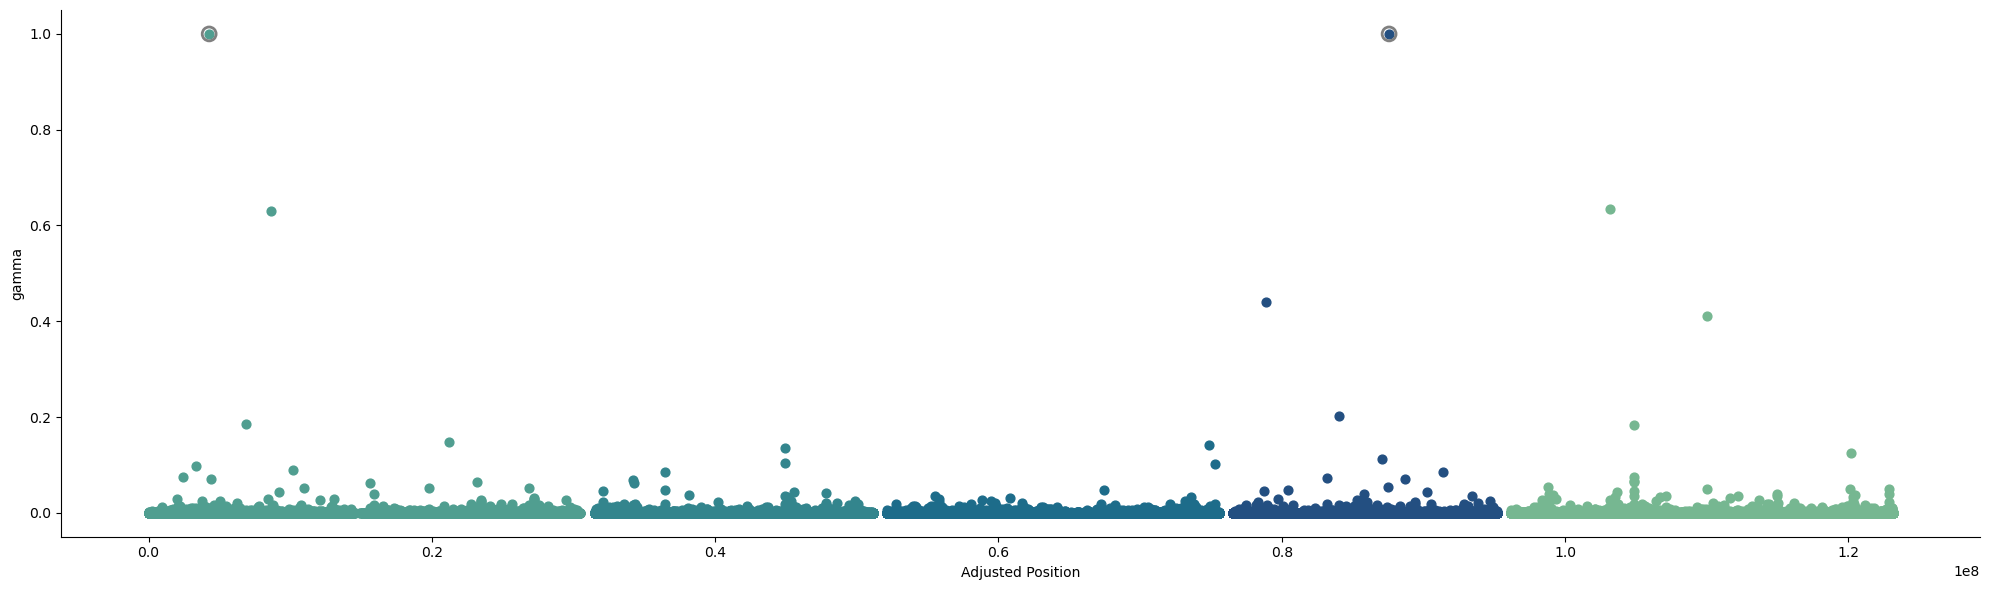

In [82]:
# Parsing chromosome number and position
df['chromosome'] = df['chr']
df['position'] = df['ps']
#df['-log10(pvalue)'] = -np.log10(df['p_wald'])

# Calculate the offset for each chromosome to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 1000000  # Adding 1 million as a buffer between chromosomes

# Apply offsets to positions
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Creating the Manhattan plot
plt.figure(figsize=(20, 6))

for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(subset['adjusted_position'], subset['gamma'], color=colors[chrom % len(colors)], label=f'Chr {chrom}', s=40)


# Highlight clumped SNPs
fdr_subset = df[df['rs'].isin(['1_4275942', '4_10999188'])] # 4_10999188
plt.scatter(fdr_subset['adjusted_position'], fdr_subset['gamma'], s=100, facecolors='none', edgecolors='grey', linewidths=2, label='after FDR')

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('gamma')
#plt.title('Manhattan Plot')
#plt.grid(axis='y')
#plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)
# Threshold line (optional)
#threshold = -np.log10(threshold_value)
#plt.axhline(y=threshold, color='grey', linestyle='dashed')

# Show the plot
plt.tight_layout()
plt.show()